In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ipl_ball_by_ball_data.csv')

In [4]:
df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# To analyze MS Dhoni - batting statistics -Whether he is still fit to play ?

In [6]:
len(df.striker.unique())

547

In [7]:
len(df.bowler.unique())

429

In [8]:
df = df[df.striker == 'MS Dhoni']

In [9]:
m_ls = list(df.match_id.unique())

In [10]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [11]:
df.reset_index(inplace = True, drop = True)

In [12]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,...,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN


In [13]:
# runs, balls - match level

In [14]:
# m_ls - matches of MS

In [15]:
runs_ls = []

for m in m_ls:
    temp_df = df[df.match_id == m]
    runs_scored = sum(temp_df.runs_off_bat)
    runs_ls.append(runs_scored)

In [16]:
# balls, runs scored: 10 balls, 10-30 balls, 30+ balls

In [17]:
df[df.match_id == 335983]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,...,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN
1,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
balls_ls = []
season_ls = []
matches_ls = []
runs_10b_ls = []
runs_10b_30b_ls = []
runs_30b_plus_ls = []

for m in m_ls:
    temp_df = df[df.match_id == m]
    season_value = list(df[df.match_id == m]['season'].unique())[0]
    temp_df_wo_wides = temp_df[temp_df.extras == 0] 
    total_balls = len(temp_df_wo_wides)
    balls_ls.append(total_balls)
    season_ls.append(season_value)
    matches_ls.append(m)

    if total_balls <= 10:
        runs_10b_ls.append(sum(temp_df_wo_wides.runs_off_bat))
        runs_10b_30b_ls.append(0)
        runs_30b_plus_ls.append(0)
    elif (total_balls > 10) & (total_balls <= 30):
        runs_10b_ls.append(sum(temp_df_wo_wides.runs_off_bat[:10]))
        runs_10b_30b_ls.append(sum(temp_df_wo_wides.runs_off_bat[10:30]))
        runs_30b_plus_ls.append(0)
    else:
        runs_10b_ls.append(sum(temp_df_wo_wides.runs_off_bat[:10]))
        runs_10b_30b_ls.append(sum(temp_df_wo_wides.runs_off_bat[10:30]))
        runs_30b_plus_ls.append(sum(temp_df_wo_wides.runs_off_bat[30:]))
        

In [19]:
mdf = pd.DataFrame()

In [20]:
mdf['season'] = season_ls
mdf['match_id'] = matches_ls
mdf['runs'] = runs_ls
mdf['balls'] = balls_ls
mdf['runs_10b'] = runs_10b_ls
mdf['runs_10b_30b'] = runs_10b_30b_ls
mdf['runs_30b_plus'] = runs_30b_plus_ls

In [32]:
import matplotlib.pyplot as plt

In [35]:
mdf.groupby(['season'])['runs'].sum().plot(kind = 'bar')
plt.ylabel('Total Runs')
plt.title('MSD - Total Runs by Season')
plt.xticks(rotation=45, ha='right')
plt.show()

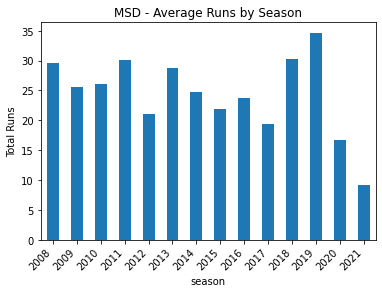

In [23]:
mdf.groupby(['season'])['runs'].mean().plot(kind = 'bar')
plt.ylabel('Total Runs')
plt.title('MSD - Average Runs by Season')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
mdf.groupby(['season'])['runs_30b_plus'].sum().plot(kind = 'bar')
plt.ylabel('Total Runs')
plt.title('MSD - Runs by Season - After 30+ balls')
plt.xticks(rotation=45, ha='right')
plt.show()

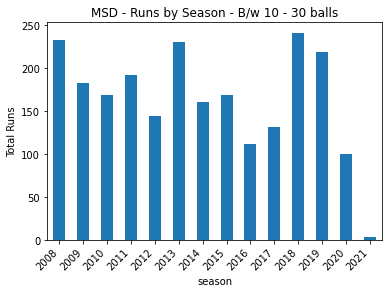

In [25]:
mdf.groupby(['season'])['runs_10b_30b'].sum().plot(kind = 'bar')
plt.ylabel('Total Runs')
plt.title('MSD - Runs by Season - B/w 10 - 30 balls')
plt.xticks(rotation=45, ha='right')
plt.show()

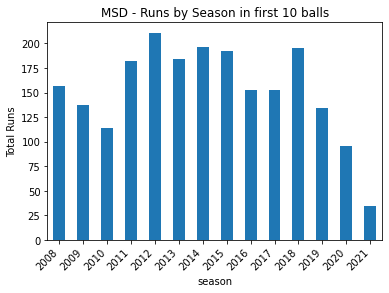

In [26]:
mdf.groupby(['season'])['runs_10b'].sum().plot(kind = 'bar')
plt.ylabel('Total Runs')
plt.title('MSD - Runs by Season in first 10 balls')
plt.xticks(rotation=45, ha='right')
plt.show()